In [4]:
import os

import pandas as pd
import readFastQ
from matplotlib import pyplot as plt
import re
%matplotlib inline

In [5]:
#read fastq files into a dictionary and group identical reads together
import gzip
lenReads=[]

Reads=dict()
with open('MR-P7-BCint-N1_R1_001.fastq','rt') as currfile:
    AllReads=readFastQ.read_fastq('Reads',currfile)
    for i in AllReads:
        lenReads.append(len(i[1]))
        if i[1] in Reads:
            Reads[i[1]]+=1
            
        else:
            Reads[i[1]]=1
orderedReadtuple = sorted(Reads.items(), key=lambda kv: kv[1])[::-1]
print(len(Reads))

18470


In [6]:
#put reads longer than 150 bp in dictionary 
filtered_reads=dict()
for sequences in Reads:
    if len(sequences)>150:
        filtered_reads[sequences]=Reads[sequences]
print(len(filtered_reads))
usablereads=0
for cuts in filtered_reads:
    usablereads+=filtered_reads[cuts]
print(usablereads)

18191
93308


In [7]:
#Use regular expression to find barcodes and add them to dictionary
BCregionhalf='TGA[ACGT]{2,3}GG[ACGT]{3,4}CC[ACGT]{3,4}'
WTSEQ='TCACATATTGCGCATGTTCGCGCACAGCATATTTATTTACTCCGATCTGTTTAAACCTAGAT'
Match_BC=dict()
unmatch_BC=dict()
for allbc in filtered_reads:
    if re.search(BCregionhalf,allbc) is not None:
        m=re.search(BCregionhalf,allbc)
        thingy=m.group()
        if thingy in Match_BC:
            Match_BC[thingy]+=filtered_reads[allbc]
        else:
            Match_BC[thingy]=filtered_reads[allbc]
    else:
        unmatch_BC[allbc]=filtered_reads[allbc]
totalBC=0
for xs in Match_BC:
    totalBC+=Match_BC[xs]
print("final BC lib size:",len(Match_BC))
print("total reads in Match_BC: ", totalBC)  
print(len(unmatch_BC))    

final BC lib size: 5888
total reads in Match_BC:  83473
2324


In [19]:
#write barcodes from dictionary into excel file
import csv

with open('paper_barcodes.csv', 'w+') as output:
    writer = csv.writer(output)
    for keyitems in Match_BC:
        writer.writerow([keyitems,Match_BC[keyitems]])

In [8]:
#Find genetic distance between barcodes, putting this distance into list of lists
from itertools import chain
import copy
mismat=[[] for l in range(len(Match_BC))]
lies=[]
print(len(mismat))
coun=0
c=0
numberz=0
comphalflenBC=dict()
comphalflenBC=copy.deepcopy(Match_BC)
print(len(comphalflenBC))        
for x in Match_BC:
    for y in comphalflenBC:
        for (char,ch) in zip(x,y):
            #print("what i'm comparing",char,ch)
            if ch!=char:
                numberz+=1
        lies.append(numberz)
        #mismat[coun].append(lies)
        #print(mismat)
        c+=1
        numberz=0
    #print(1)
    c=0
    coun+=1


5888
5888
0


In [11]:
#make sections of 5888 of giant list
from __future__ import generators
def divide_chunks(l, n):
    for xl in range(0, len(l), n):
        yield l[xl:xl + n]
n=5888
chunks=list(divide_chunks(lies,n))
print(len(chunks))


5888
5888


In [12]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
titles=(range(5888))
len(titles)
percentage=py.array(chunks)
percentage.shape
df=pd.DataFrame(data=percentage, index=titles, columns=titles)
print(df)

      0     1     2     3     4     5     6     7     8     9     ...   5878  \
0        0     7     8     6    10     7     7     6     8     8  ...      9   
1        7     0    10     7     9     9    10     9     8     7  ...      8   
2        8    10     0     7    10     7     9     7     7     9  ...      8   
3        6     7     7     0     9     7     8     7     8     9  ...      8   
4       10     9    10     9     0     8     9    10     9    10  ...      9   
5        7     9     7     7     8     0     8     6     9     8  ...      9   
6        7    10     9     8     9     8     0     8     8     6  ...      9   
7        6     9     7     7    10     6     8     0     8    10  ...     10   
8        8     8     7     8     9     9     8     8     0     9  ...      8   
9        8     7     9     9    10     8     6    10     9     0  ...      7   
10       8     9     8     9     8     9    10     9     5    10  ...      8   
11       7     9     8     8     9     9

<function matplotlib.pyplot.show>

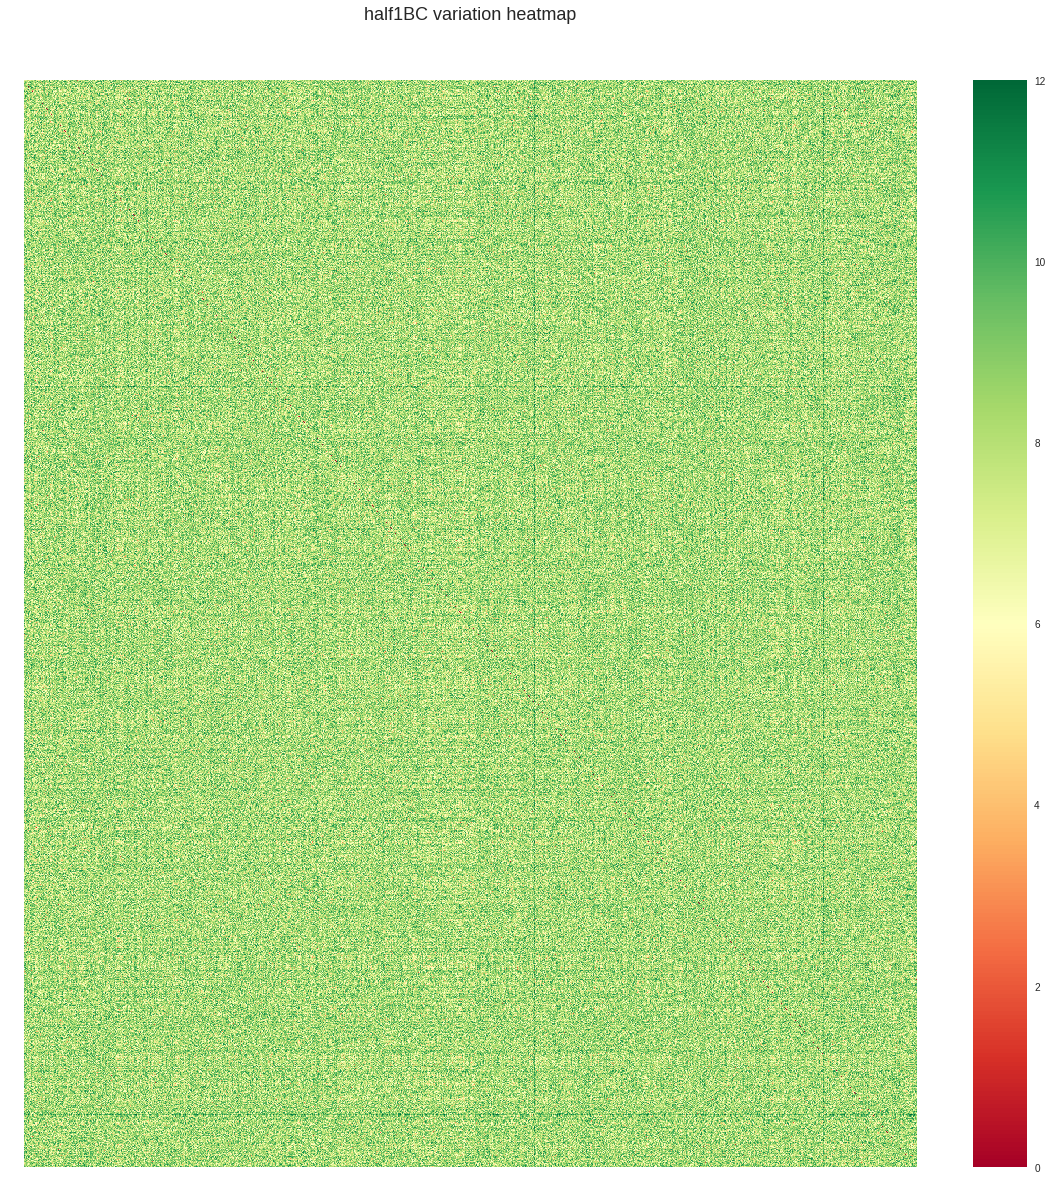

In [17]:
#plot heatmap showing genetic distance between barcodes
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
titles=(range(5888))
len(titles)
percentage=py.array(chunks)
percentage.shape
df=pd.DataFrame(data=percentage, index=titles, columns=titles)
fig,ax=plt.subplots(figsize=(20,20))
title = "BC variation heatmap"
plt.title(title,fontsize=18)
ttl=ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(df,cmap='RdYlGn')
plt.show

In [18]:
#export heatmap data into excel
import csv

with open('chunks_paper.csv', 'w+') as output:
    writer = csv.writer(output)
    for chu in chunks:
        writer.writerow(chu)